In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv('lahore_housing_prices.csv')
df.head(10)

,house_id,Type,Location,Area,Bath(s),Bedroom(s),Price
0,46326643,House,"DHA Defence, Lahore, Punjab",1 Kanal,6,5,75500000
1,46952582,House,"Bahria Orchard, Lahore, Punjab",8 Marla,5,5,25000000
2,47357581,House,"Paragon City, Lahore, Punjab",10 Marla,6,5,47000000
3,47397157,Flat,"Askari, Lahore, Punjab",10 Marla,3,3,28000000
4,43109993,House,"DHA Defence, Lahore, Punjab",8 Marla,5,4,43500000
5,47357357,House,"Paragon City, Lahore, Punjab",10 Marla,5,4,48000000
6,47266757,House,"Bahria Orchard, Lahore, Punjab",5 Marla,4,4,18000000
7,46600922,House,"Bahria Orchard, Lahore, Punjab",5 Marla,4,4,18000000
8,46600920,House,"Bahria Orchard, Lahore, Punjab",5 Marla,4,4,18000000
9,47397026,House,"Bahria Orchard, Lahore, Punjab",10 Marla,5,5,37000000


In [5]:
df.shape

(17169, 7)

In [6]:
df1=df.drop(['house_id', 'Type'], axis='columns')
df1.head(20)

,Location,Area,Bath(s),Bedroom(s),Price
0,"DHA Defence, Lahore, Punjab",1 Kanal,6,5,75500000
1,"Bahria Orchard, Lahore, Punjab",8 Marla,5,5,25000000
2,"Paragon City, Lahore, Punjab",10 Marla,6,5,47000000
3,"Askari, Lahore, Punjab",10 Marla,3,3,28000000
4,"DHA Defence, Lahore, Punjab",8 Marla,5,4,43500000
5,"Paragon City, Lahore, Punjab",10 Marla,5,4,48000000
6,"Bahria Orchard, Lahore, Punjab",5 Marla,4,4,18000000
7,"Bahria Orchard, Lahore, Punjab",5 Marla,4,4,18000000
8,"Bahria Orchard, Lahore, Punjab",5 Marla,4,4,18000000
9,"Bahria Orchard, Lahore, Punjab",10 Marla,5,5,37000000


In [7]:
df1.isnull().sum()

Location      0
Area          0
Bath(s)       0
Bedroom(s)    0
Price         0
dtype: int64

In [8]:
df1['Area'].unique()

array(['1 Kanal', '8 Marla', '10 Marla', '5 Marla', '2.5 Marla',
       '2 Kanal', '1.3 Kanal', '3 Marla', '4 Marla', '12 Marla',
       '1.1 Kanal', '9 Marla', '6.1 Marla', '7.6 Marla', '7 Marla',
       '3.5 Marla', '6 Marla', '1.3 Marla', '2.3 Marla', '2.2 Marla',
       '2.6 Marla', '2 Marla', '5.5 Marla', '7.3 Marla', '11 Marla',
       '1.8 Marla', '16 Marla', '3.8 Marla', '2.7 Marla', '2.4 Marla',
       '6.8 Marla', '11.1 Marla', '4.2 Marla', '1.4 Marla', '8.7 Marla',
       '1.5 Marla', '1.6 Kanal', '13 Marla', '5.1 Marla', '1.6 Marla',
       '1.5 Kanal', '8.2 Marla', '5.3 Marla', '5.2 Marla', '1.7 Kanal',
       '1.8 Kanal', '1.2 Kanal', '4.6 Marla', '14 Marla', '3.3 Marla',
       '5.4 Marla', '4.9 Marla', '17 Marla', '18 Marla', '4 Kanal',
       '13.4 Marla', '3.9 Marla', '11.5 Marla', '2.8 Marla', '3 Kanal',
       '6.5 Marla', '2.3 Kanal', '4.1 Kanal', '7.8 Marla', '2.9 Marla',
       '15 Marla', '3.2 Marla', '4.5 Marla', '12.7 Marla', '6.3 Marla',
       '1.7 Marla', '

In [9]:
def area_to_marla(area_str):
    area_str=area_str.lower()
    if 'marla' in area_str:
        return float(area_str.split()[0])
    elif 'kanal' in area_str:
        return float(area_str.split()[0]) * 20
    else:
        return None

In [10]:
df2=df1.copy()
df2['Area_Marla'] = df2['Area'].apply(area_to_marla)
df2.head(20)

,Location,Area,Bath(s),Bedroom(s),Price,Area_Marla
0,"DHA Defence, Lahore, Punjab",1 Kanal,6,5,75500000,20.0
1,"Bahria Orchard, Lahore, Punjab",8 Marla,5,5,25000000,8.0
2,"Paragon City, Lahore, Punjab",10 Marla,6,5,47000000,10.0
3,"Askari, Lahore, Punjab",10 Marla,3,3,28000000,10.0
4,"DHA Defence, Lahore, Punjab",8 Marla,5,4,43500000,8.0
5,"Paragon City, Lahore, Punjab",10 Marla,5,4,48000000,10.0
6,"Bahria Orchard, Lahore, Punjab",5 Marla,4,4,18000000,5.0
7,"Bahria Orchard, Lahore, Punjab",5 Marla,4,4,18000000,5.0
8,"Bahria Orchard, Lahore, Punjab",5 Marla,4,4,18000000,5.0
9,"Bahria Orchard, Lahore, Punjab",10 Marla,5,5,37000000,10.0


In [11]:
df2['Area_Marla'].unique()

array([ 20. ,   8. ,  10. ,   5. ,   2.5,  40. ,  26. ,   3. ,   4. ,
        12. ,  22. ,   9. ,   6.1,   7.6,   7. ,   3.5,   6. ,   1.3,
         2.3,   2.2,   2.6,   2. ,   5.5,   7.3,  11. ,   1.8,  16. ,
         3.8,   2.7,   2.4,   6.8,  11.1,   4.2,   1.4,   8.7,   1.5,
        32. ,  13. ,   5.1,   1.6,  30. ,   8.2,   5.3,   5.2,  34. ,
        36. ,  24. ,   4.6,  14. ,   3.3,   5.4,   4.9,  17. ,  18. ,
        80. ,  13.4,   3.9,  11.5,   2.8,  60. ,   6.5,  46. ,  82. ,
         7.8,   2.9,  15. ,   3.2,   4.5,  12.7,   6.3,   1.7,   3.6,
       120. ,  11.2,  19.2,  88. ,  12.9,   6.7,  10.5,  10.7,   7.5,
         1.9,   2.1,  28. ,  10.8,   4.4, 100. ,  64. ,   9.3,   7.2,
         5.8,   5.6,  10.1,   9.5,   3.1,  13.1,   8.1,  13.3,  17.8,
       160. ,  14.1,  14.7,  13.5,  18.7,  14.8,   9.6,   3.7,   4.8,
         9.2,  12.5, 136. ,   9.4,  14.5,  17.2,  13.7,   4.7,   1.1,
         8.4,  15.1,  48. ,  42. ,   1. ,  52. ,  44. ,   8.5,  19. ,
         9.8,   1.2,

In [12]:
df3=df2.copy()
df3['Price_Per_Marla']=df3['Price']/df3['Area_Marla']
df3.head(10)

,Location,Area,Bath(s),Bedroom(s),Price,Area_Marla,Price_Per_Marla
0,"DHA Defence, Lahore, Punjab",1 Kanal,6,5,75500000,20.0,3775000.0
1,"Bahria Orchard, Lahore, Punjab",8 Marla,5,5,25000000,8.0,3125000.0
2,"Paragon City, Lahore, Punjab",10 Marla,6,5,47000000,10.0,4700000.0
3,"Askari, Lahore, Punjab",10 Marla,3,3,28000000,10.0,2800000.0
4,"DHA Defence, Lahore, Punjab",8 Marla,5,4,43500000,8.0,5437500.0
5,"Paragon City, Lahore, Punjab",10 Marla,5,4,48000000,10.0,4800000.0
6,"Bahria Orchard, Lahore, Punjab",5 Marla,4,4,18000000,5.0,3600000.0
7,"Bahria Orchard, Lahore, Punjab",5 Marla,4,4,18000000,5.0,3600000.0
8,"Bahria Orchard, Lahore, Punjab",5 Marla,4,4,18000000,5.0,3600000.0
9,"Bahria Orchard, Lahore, Punjab",10 Marla,5,5,37000000,10.0,3700000.0


In [13]:
len(df3['Location'].unique())

324

In [14]:
df3['Location']=df3['Location'].apply(lambda x: x.strip())
location_count=df3.groupby('Location')['Location'].agg('count').sort_values(ascending=False)
location_count

Location
DHA Defence, Lahore, Punjab        4845
Bahria Town, Lahore, Punjab        1767
Askari, Lahore, Punjab              852
Raiwind Road, Lahore, Punjab        599
Johar Town, Lahore, Punjab          511
                                   ... 
Toheed Park, Lahore, Punjab           1
Abbot Road, Lahore, Punjab            1
Aashiana Road, Lahore, Punjab         1
Zohra Homes, Lahore, Punjab           1
Al Hamad Colony, Lahore, Punjab       1
Name: Location, Length: 324, dtype: int64

In [15]:
len(location_count[location_count<=10])

223

In [16]:
location_less_then_10=location_count[location_count<=10]
location_less_then_10

Location
Shah Jamal, Lahore, Punjab                10
Zaitoon City, Lahore, Punjab              10
Sunfort Gardens, Lahore, Punjab           10
Rail Town (Canal City), Lahore, Punjab    10
Rehan Garden, Lahore, Punjab              10
                                          ..
Toheed Park, Lahore, Punjab                1
Abbot Road, Lahore, Punjab                 1
Aashiana Road, Lahore, Punjab              1
Zohra Homes, Lahore, Punjab                1
Al Hamad Colony, Lahore, Punjab            1
Name: Location, Length: 223, dtype: int64

In [17]:
df3.Location=df3.Location.apply(lambda x: 'Other' if x in location_less_then_10 else x)
len(df3['Location'].unique())

102

In [18]:
df3.head(20)

,Location,Area,Bath(s),Bedroom(s),Price,Area_Marla,Price_Per_Marla
0,"DHA Defence, Lahore, Punjab",1 Kanal,6,5,75500000,20.0,3775000.0
1,"Bahria Orchard, Lahore, Punjab",8 Marla,5,5,25000000,8.0,3125000.0
2,"Paragon City, Lahore, Punjab",10 Marla,6,5,47000000,10.0,4700000.0
3,"Askari, Lahore, Punjab",10 Marla,3,3,28000000,10.0,2800000.0
4,"DHA Defence, Lahore, Punjab",8 Marla,5,4,43500000,8.0,5437500.0
5,"Paragon City, Lahore, Punjab",10 Marla,5,4,48000000,10.0,4800000.0
6,"Bahria Orchard, Lahore, Punjab",5 Marla,4,4,18000000,5.0,3600000.0
7,"Bahria Orchard, Lahore, Punjab",5 Marla,4,4,18000000,5.0,3600000.0
8,"Bahria Orchard, Lahore, Punjab",5 Marla,4,4,18000000,5.0,3600000.0
9,"Bahria Orchard, Lahore, Punjab",10 Marla,5,5,37000000,10.0,3700000.0


In [19]:
df3[df3['Location']== 'Other']

,Location,Area,Bath(s),Bedroom(s),Price,Area_Marla,Price_Per_Marla
14,Other,2.5 Marla,3,3,5500000,2.5,2.200000e+06
102,Other,4 Marla,4,3,11500000,4.0,2.875000e+06
138,Other,2.5 Marla,3,3,11500000,2.5,4.600000e+06
168,Other,10 Marla,6,6,42000000,10.0,4.200000e+06
230,Other,5 Marla,3,3,22500000,5.0,4.500000e+06
...,...,...,...,...,...,...,...
16906,Other,3.5 Marla,5,5,7000000,3.5,2.000000e+06
16907,Other,3 Marla,2,3,2500000,3.0,8.333333e+05
16970,Other,1 Kanal,5,4,147500000,20.0,7.375000e+06
17092,Other,10 Marla,5,4,42500000,10.0,4.250000e+06


In [20]:
df3[df3["Area_Marla"]/df3["Bedroom(s)"]<1]

,Location,Area,Bath(s),Bedroom(s),Price,Area_Marla,Price_Per_Marla
14,Other,2.5 Marla,3,3,5500000,2.5,2.200000e+06
129,"Central Park Housing Scheme, Lahore, Punjab",3.5 Marla,4,4,12500000,3.5,3.571429e+06
138,Other,2.5 Marla,3,3,11500000,2.5,4.600000e+06
144,"GT Road, Lahore, Punjab",3 Marla,5,4,11600000,3.0,3.866667e+06
226,"Ferozepur Road, Lahore, Punjab",2.6 Marla,3,3,6595000,2.6,2.536538e+06
...,...,...,...,...,...,...,...
16851,Other,2.5 Marla,3,3,11500000,2.5,4.600000e+06
16885,"Jubilee Town, Lahore, Punjab",3 Marla,4,4,13500000,3.0,4.500000e+06
16906,Other,3.5 Marla,5,5,7000000,3.5,2.000000e+06
16935,"Formanites Housing Scheme, Lahore, Punjab",3 Marla,4,5,12000000,3.0,4.000000e+06


In [24]:
df3.shape

(17169, 7)

In [26]:
df4=df3[~(df3["Area_Marla"]/df3["Bedroom(s)"]<1)]
df4.shape

(16545, 7)

In [27]:
df4.Price_Per_Marla.describe().apply(lambda x: f"{x:,.0f}")

count        16,545
mean      3,882,374
std       1,316,204
min           5,750
25%       3,125,000
50%       3,750,000
75%       4,480,000
max      37,000,000
Name: Price_Per_Marla, dtype: object

In [28]:
def remove_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Location'):
        m = np.mean(subdf.Price_Per_Marla)
        st = np.std(subdf.Price_Per_Marla)
        reduced_df = subdf[(subdf.Price_Per_Marla>(m-st)) & (subdf.Price_Per_Marla<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df5 = remove_outliers(df4)
df5.shape

(12148, 7)

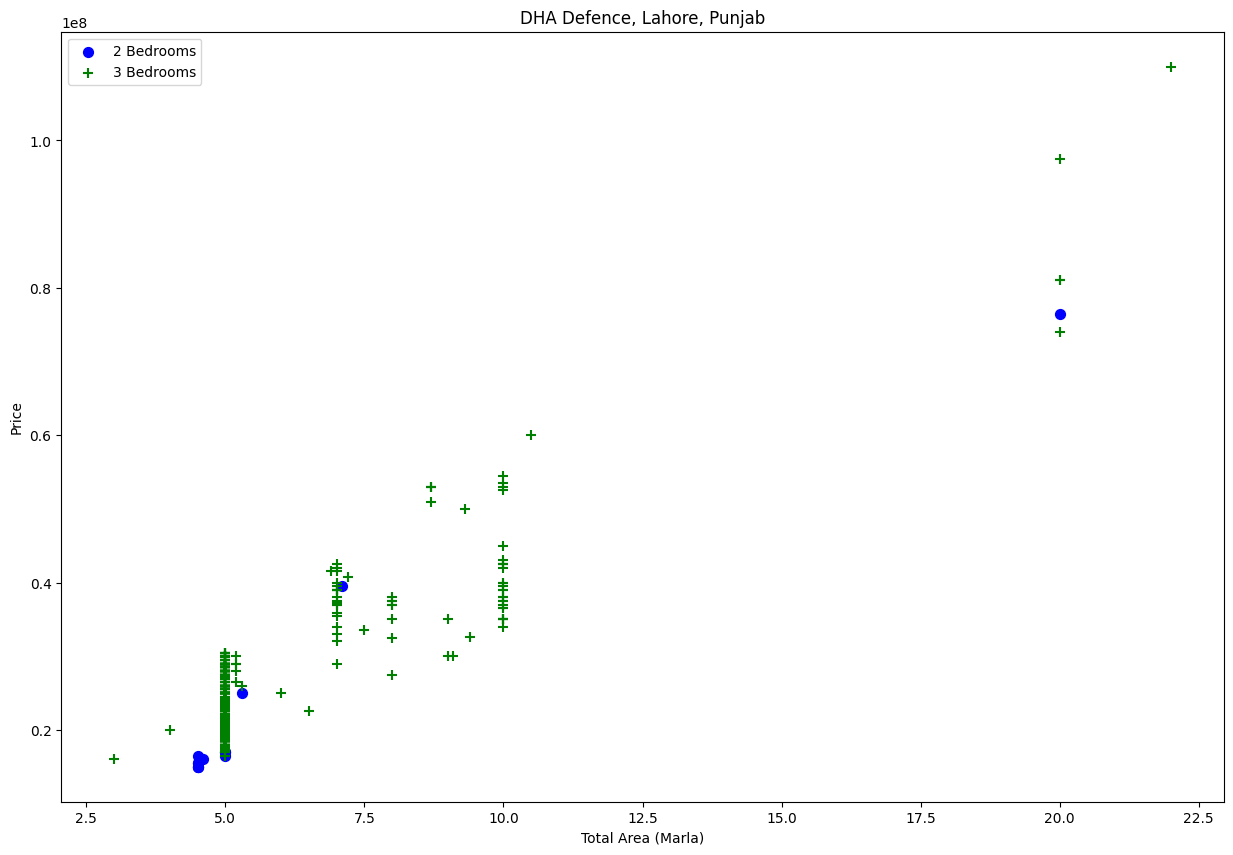

In [29]:
import matplotlib.pyplot as plt

def plot_scatter_chart(df, location):
    bed2 = df[(df.Location == location) & (df['Bedroom(s)'] == 2)]
    
    bed3 = df[(df.Location == location) & (df['Bedroom(s)'] == 3)]
    
    plt.rcParams['figure.figsize'] = (15, 10)
    
    plt.scatter(bed2.Area_Marla, bed2.Price, color='blue', label='2 Bedrooms', s=50)
    
    plt.scatter(bed3.Area_Marla, bed3.Price, marker='+', color='green', label='3 Bedrooms', s=50)
    
    plt.xlabel("Total Area (Marla)")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df5, "DHA Defence, Lahore, Punjab")

In [30]:
import numpy as np

def remove_bedroom_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('Location'):
        bedroom_stats = {}
        for beds, beds_df in location_df.groupby('Bedroom(s)'):
            bedroom_stats[beds] = {
                'mean': np.mean(beds_df.Price_Per_Marla),
                'std': np.std(beds_df.Price_Per_Marla),
                'count': beds_df.shape[0]
            }
        for beds, beds_df in location_df.groupby('Bedroom(s)'):
            stats = bedroom_stats.get(beds - 1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(
                    exclude_indices,
                    beds_df[beds_df.Price_Per_Marla < stats['mean']].index.values
                )
    return df.drop(exclude_indices, axis='index')

df6 = remove_bedroom_outliers(df5)

In [31]:
df6.shape

(7832, 7)

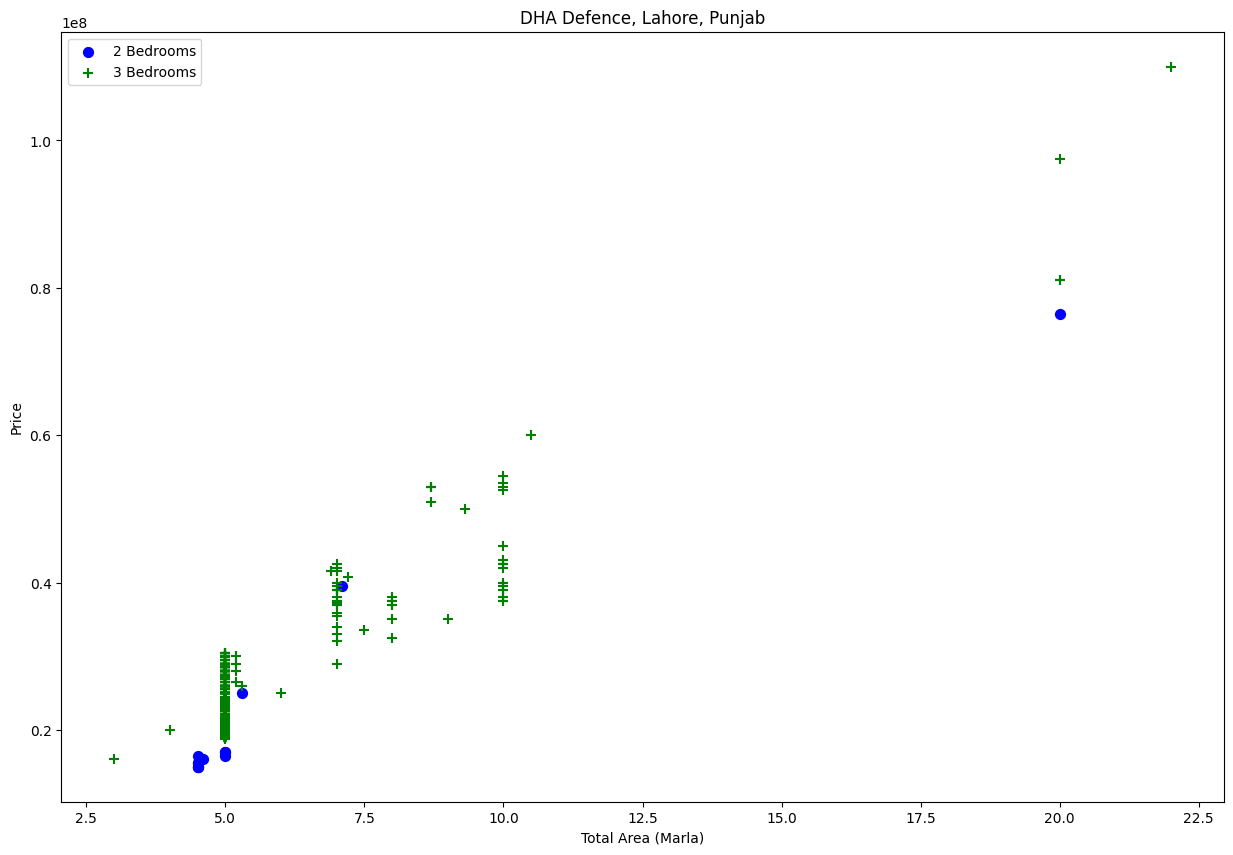

In [32]:
import matplotlib.pyplot as plt

def plot_scatter_chart(df, location):
    bed2 = df[(df.Location == location) & (df['Bedroom(s)'] == 2)]
    
    bed3 = df[(df.Location == location) & (df['Bedroom(s)'] == 3)]
    
    plt.rcParams['figure.figsize'] = (15, 10)
    
    plt.scatter(bed2.Area_Marla, bed2.Price, color='blue', label='2 Bedrooms', s=50)
    
    plt.scatter(bed3.Area_Marla, bed3.Price, marker='+', color='green', label='3 Bedrooms', s=50)
    
    plt.xlabel("Total Area (Marla)")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df6, "DHA Defence, Lahore, Punjab")

Text(0, 0.5, 'Count')

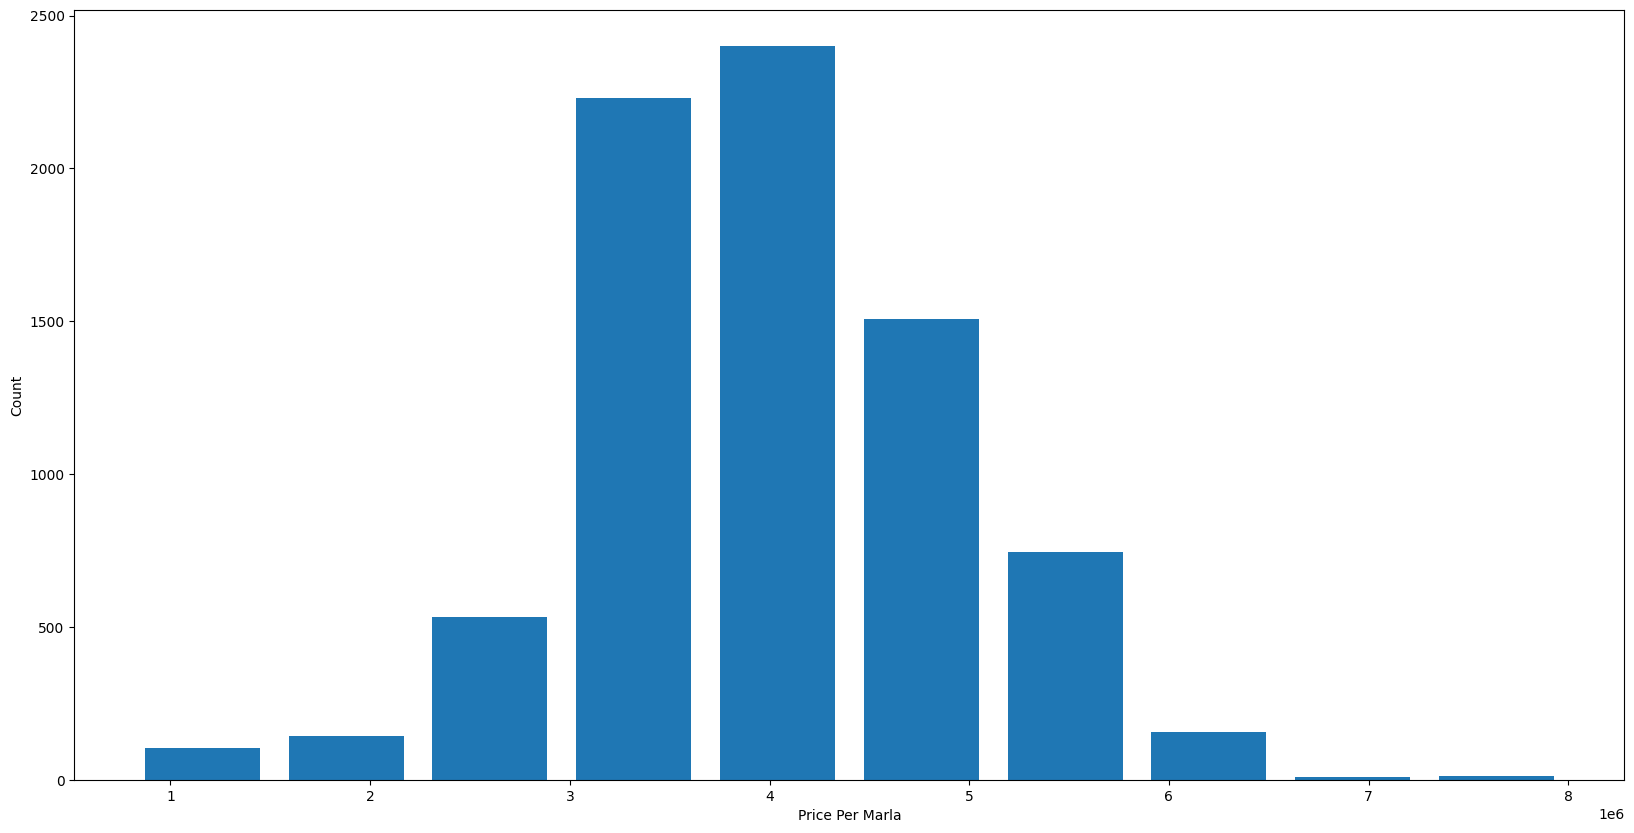

In [33]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.hist(df6.Price_Per_Marla, rwidth=0.8)
plt.xlabel("Price Per Marla")
plt.ylabel("Count")

In [34]:
df6['Bath(s)'].unique()

array([ 3,  6,  4,  5,  2,  1,  7,  8, 10,  9])

In [35]:
df6[df6['Bath(s)']>7]

,Location,Area,Bath(s),Bedroom(s),Price,Area_Marla,Price_Per_Marla
2266,"Bahria Town, Lahore, Punjab",1 Kanal,8,7,70000000,20.0,3.500000e+06
2459,"Bahria Town, Lahore, Punjab",2 Kanal,8,7,165000000,40.0,4.125000e+06
4615,"DHA Defence, Lahore, Punjab",1.2 Kanal,8,7,125000000,24.0,5.208333e+06
5568,"DHA Defence, Lahore, Punjab",1.7 Kanal,10,9,130000000,34.0,3.823529e+06
6955,"DHA Defence, Lahore, Punjab",2 Kanal,8,7,210000000,40.0,5.250000e+06
7824,"GT Road, Lahore, Punjab",10 Marla,8,7,35000000,10.0,3.500000e+06
7979,"Gulberg, Lahore, Punjab",4.4 Kanal,8,8,400000000,88.0,4.545455e+06
8037,"Gulberg, Lahore, Punjab",4 Kanal,10,11,440000000,80.0,5.500000e+06
8168,"IEP Engineers Town, Lahore, Punjab",2 Kanal,8,8,130000000,40.0,3.250000e+06
9235,"Model Town, Lahore, Punjab",4 Kanal,8,8,380000000,80.0,4.750000e+06


In [36]:
df6[df6['Bath(s)']>df6['Bedroom(s)']+2]

,Location,Area,Bath(s),Bedroom(s),Price,Area_Marla,Price_Per_Marla
134,"Al Rehman Garden, Lahore, Punjab",4 Marla,6,3,13000000,4.0,3250000.0
1252,"Bahria Orchard, Lahore, Punjab",6 Marla,6,3,18000000,6.0,3000000.0
1313,"Bahria Town, Lahore, Punjab",5 Marla,6,3,18500000,5.0,3700000.0
1451,"Bahria Town, Lahore, Punjab",5 Marla,6,3,17500000,5.0,3500000.0
6881,"DHA Defence, Lahore, Punjab",1 Kanal,6,2,76500000,20.0,3825000.0
9719,Other,1.2 Kanal,10,6,105000000,24.0,4375000.0


In [37]:
df7=df6[df6['Bath(s)']<df6['Bedroom(s)']+2]
df7.shape

(7592, 7)

In [38]:
df8=df7.drop(['Area','Price_Per_Marla'],axis=1)
df8.head(10)

,Location,Bath(s),Bedroom(s),Price,Area_Marla
0,"Al Noor Park Housing Society, Lahore, Punjab",3,3,4800000,3.0
1,"Al Noor Park Housing Society, Lahore, Punjab",3,3,7000000,4.0
2,"Al Noor Park Housing Society, Lahore, Punjab",3,3,4500000,3.0
3,"Al Noor Park Housing Society, Lahore, Punjab",3,3,4500000,3.0
4,"Al Noor Park Housing Society, Lahore, Punjab",3,3,4500000,3.0
5,"Al Noor Park Housing Society, Lahore, Punjab",3,3,4500000,3.0
6,"Al Noor Park Housing Society, Lahore, Punjab",3,3,4500000,3.0
7,"Al Noor Park Housing Society, Lahore, Punjab",3,3,6000000,3.0
8,"Al Noor Park Housing Society, Lahore, Punjab",3,3,6000000,3.0
9,"Al Noor Park Housing Society, Lahore, Punjab",3,3,6000000,3.0


In [39]:
df8.shape

(7592, 5)

In [40]:
dummies=pd.get_dummies(df8.Location)
dummies.head()

,"Al Noor Park Housing Society, Lahore, Punjab","Al Rehman Garden, Lahore, Punjab","Al-Hafiz Town, Lahore, Punjab","Al-Hamad Colony (AIT), Lahore, Punjab","Al-Hamd Park, Lahore, Punjab","Allama Iqbal Town, Lahore, Punjab","Architects Engineers Housing Society, Lahore, Punjab","Askari, Lahore, Punjab","Audit & Accounts Housing Society, Lahore, Punjab","Awan Town, Lahore, Punjab",...,"Super Town, Lahore, Punjab","Taj Bagh Scheme, Lahore, Punjab","Tariq Gardens, Lahore, Punjab","Thokar Niaz Baig, Lahore, Punjab","Township, Lahore, Punjab","UET Housing Society, Lahore, Punjab","Valencia Housing Society, Lahore, Punjab","Vital Homes Housing Scheme, Lahore, Punjab","Walton Road, Lahore, Punjab","Wapda Town, Lahore, Punjab"
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [41]:
df9 = pd.concat([df8, dummies.drop('Other', axis='columns')], axis='columns')
df9.head()

,Location,Bath(s),Bedroom(s),Price,Area_Marla,"Al Noor Park Housing Society, Lahore, Punjab","Al Rehman Garden, Lahore, Punjab","Al-Hafiz Town, Lahore, Punjab","Al-Hamad Colony (AIT), Lahore, Punjab","Al-Hamd Park, Lahore, Punjab",...,"Super Town, Lahore, Punjab","Taj Bagh Scheme, Lahore, Punjab","Tariq Gardens, Lahore, Punjab","Thokar Niaz Baig, Lahore, Punjab","Township, Lahore, Punjab","UET Housing Society, Lahore, Punjab","Valencia Housing Society, Lahore, Punjab","Vital Homes Housing Scheme, Lahore, Punjab","Walton Road, Lahore, Punjab","Wapda Town, Lahore, Punjab"
0,"Al Noor Park Housing Society, Lahore, Punjab",3,3,4800000,3.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,"Al Noor Park Housing Society, Lahore, Punjab",3,3,7000000,4.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,"Al Noor Park Housing Society, Lahore, Punjab",3,3,4500000,3.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,"Al Noor Park Housing Society, Lahore, Punjab",3,3,4500000,3.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,"Al Noor Park Housing Society, Lahore, Punjab",3,3,4500000,3.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [42]:
df10=df9.drop('Location',axis=1)
df10.head()

,Bath(s),Bedroom(s),Price,Area_Marla,"Al Noor Park Housing Society, Lahore, Punjab","Al Rehman Garden, Lahore, Punjab","Al-Hafiz Town, Lahore, Punjab","Al-Hamad Colony (AIT), Lahore, Punjab","Al-Hamd Park, Lahore, Punjab","Allama Iqbal Town, Lahore, Punjab",...,"Super Town, Lahore, Punjab","Taj Bagh Scheme, Lahore, Punjab","Tariq Gardens, Lahore, Punjab","Thokar Niaz Baig, Lahore, Punjab","Township, Lahore, Punjab","UET Housing Society, Lahore, Punjab","Valencia Housing Society, Lahore, Punjab","Vital Homes Housing Scheme, Lahore, Punjab","Walton Road, Lahore, Punjab","Wapda Town, Lahore, Punjab"
0,3,3,4800000,3.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3,3,7000000,4.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,3,4500000,3.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,3,4500000,3.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3,3,4500000,3.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [43]:
df10.shape

(7592, 105)

In [44]:
x=df10.drop('Price',axis=1)
x.shape

(7592, 104)

In [45]:
y=df10.Price
y.head()

0    4800000
1    7000000
2    4500000
3    4500000
4    4500000
Name: Price, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [47]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9510673749820638

In [48]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.95026537, 0.94479214, 0.94342745, 0.94250278, 0.93331263])

In [49]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
dt.score(x_test, y_test)

0.9744849893215055

In [50]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
cross_val_score(DecisionTreeRegressor(), x, y, cv=cv)

array([0.94321936, 0.96582027, 0.96704989, 0.97693784, 0.96194585])

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def find_best_model_using_gridsearchcv(x, y):
    algos = {
        'linear_regression': {
    'model': LinearRegression(),
    'params': {}
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(x, y)


,model,best_score,best_params
0,linear_regression,0.943521,{}
1,lasso,0.943521,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.968583,"{'criterion': 'squared_error', 'splitter': 'be..."


In [52]:
def predict_price(Location, Area_Marla, bedrooms, bath):
    vals_df = pd.DataFrame(np.zeros((1, len(x.columns))), columns=x.columns)

    vals_df.at[0, "Bath(s)"] = bath
    vals_df.at[0, "Bedroom(s)"] = bedrooms
    vals_df.at[0, "Area_Marla"] = Area_Marla

    if Location in x.columns:
        vals_df.at[0, Location] = 1

    return model.predict(vals_df)[0]

In [53]:
print(predict_price("Al-Hamd Park, Lahore, Punjab", 15.0, 5, 4))

62818804.90715459


In [54]:
print(predict_price("Wapda Town, Lahore, Punjab", 5.0, 3, 3))

17356947.461634513


In [55]:
print(predict_price("Tariq Gardens, Lahore, Punjab", 4.5, 2, 2))

16886517.03555574


In [56]:
import pickle
with open('lahore_home_prices_model.pickle','wb') as f:
    pickle.dump(dt,f)

In [57]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))